In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv('NIFTY 50_Data.csv')
df

,Date,Open,High,Low,Close
0,02-Mar-22,16593.10,16678.50,16478.65,16605.95
1,03-Mar-22,16723.20,16768.95,16442.95,16498.05
2,04-Mar-22,16339.45,16456.00,16133.80,16245.35
3,07-Mar-22,15867.95,15944.60,15711.45,15863.15
4,08-Mar-22,15747.75,16028.75,15671.45,16013.45
...,...,...,...,...,...
288,03-May-23,18113.80,18116.35,18042.40,18089.85
289,04-May-23,18081.00,18267.45,18066.70,18255.80
290,05-May-23,18117.30,18216.95,18055.45,18069.00
291,08-May-23,18120.60,18286.95,18100.30,18264.40


In [3]:
for col in df.columns:
    if col != 'Date':
        df = df[np.abs(df[col] - df[col].mean()) <= (3 * df[col].std())]

# Normalizing the data
for col in df.columns:
    if col != 'Date':
        df[col] = (df[col] - df[col].mean()) / df[col].std()

# Removing duplicates
df = df.drop_duplicates()

# Checking for data accuracy
for col in df.columns:
    if col != 'Date':
        print(col, 'Min:', df[col].min(), 'Max:', df[col].max())

# Displaying the cleaned dataset
print(df.head())

Open Min: -2.594099399525983 Max: 1.9033580671145647
High Min: -2.6105156734887394 Max: 1.852445931644439
Low Min: -2.5444720950407063 Max: 1.899095008543689
Close Min: -2.561858085588998 Max: 1.8406950140001757
        Date      Open      High       Low     Close
0  02-Mar-22 -0.944149 -0.960349 -0.943401 -0.919877
1  03-Mar-22 -0.781584 -0.845181 -0.987530 -1.054869
2  04-Mar-22 -1.261094 -1.243653 -1.369673 -1.371017
3  07-Mar-22 -1.850250 -1.894807 -1.891744 -1.849180
4  08-Mar-22 -2.000445 -1.787661 -1.941189 -1.661143


In [4]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    293 non-null    object 
 1   Open    293 non-null    float64
 2   High    293 non-null    float64
 3   Low     293 non-null    float64
 4   Close   293 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.7+ KB


<Axes: >

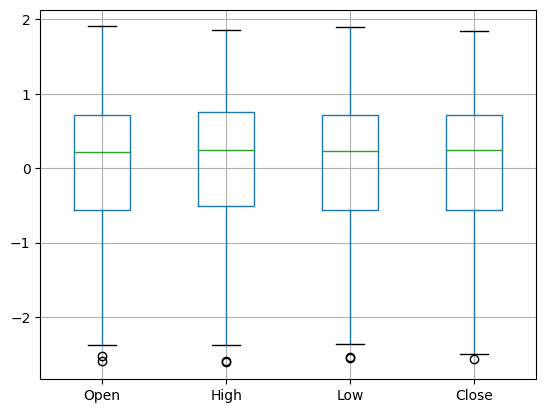

In [6]:
df.boxplot()

In [7]:
relevant_features = ['Open', 'High', 'Low', 'Close']

# Creating a new dataframe with only the relevant features
df_relevant = df[relevant_features]

# Adding moving averages as additional features
ma_5 = df['Close'].rolling(window=5).mean()
ma_10 = df['Close'].rolling(window=10).mean()
ma_20 = df['Close'].rolling(window=20).mean()
df_relevant['MA_5'] = ma_5
df_relevant['MA_10'] = ma_10
df_relevant['MA_20'] = ma_20

# Adding technical indicators as additional features
# Example: Relative Strength Index (RSI)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df_relevant['RSI'] = rsi

# Displaying the new dataframe
print(df_relevant.head())





       Open      High       Low     Close      MA_5  MA_10  MA_20  RSI
0 -0.944149 -0.960349 -0.943401 -0.919877       NaN    NaN    NaN  NaN
1 -0.781584 -0.845181 -0.987530 -1.054869       NaN    NaN    NaN  NaN
2 -1.261094 -1.243653 -1.369673 -1.371017       NaN    NaN    NaN  NaN
3 -1.850250 -1.894807 -1.891744 -1.849180       NaN    NaN    NaN  NaN
4 -2.000445 -1.787661 -1.941189 -1.661143 -1.371217    NaN    NaN  NaN


In [8]:
# Adding news/sentiment analysis as additional features
# Example: Vader sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['News_Sentiment'] = df['News'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_relevant['News_Sentiment'] = df['News_Sentiment']

# Displaying the new dataframe
print(df_relevant.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IN284372\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'News'

In [10]:
# Converting the date column to datetime format


# Setting the date column as the index
df.set_index('Date', inplace=True)

# Resampling the data to daily frequency
df_daily = df.resample('D').mean().fillna(method='ffill')

# Dropping unnecessary columns
df_daily.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

# Adding lagged features
for i in range(1, 8):
    df_daily[f'Close_lag_{i}'] = df_daily['Close'].shift(i)

# Dropping rows with missing values
df_daily.dropna(inplace=True)

# Saving the transformed data to a new csv file
df_daily.to_csv('stock_prices_daily.csv')


KeyError: 'Date'